# Homework 1: Introduction to Optimization and Least Squares

Daria Dubovskaia

## Problem 1: Gradient Descent

(a) Consider the mathematical function defined on $f: \mathbb{R}^2\,\to\, \mathbb{R}$:

$$
f(x,y) = (x-1)^2 + (y+2)^2,
$$

Find the single critical point of this function and show that it is a local minimum (in this case, this will also be a global minimum).

**Solution:**

First, we find the critical points by calculating the partial derivatives and setting them equal to zero. The solution is $x_{*} = 1, y_{*} = -2$.

$$
\frac{\partial f}{\partial x} = 2(x-1) + 0 = 0,  \\
\frac{\partial f}{\partial y} = 0 + 2(y+2) = 0, \\
$$
the Hessian matrix from second partial derivatives:
$$
H = \begin{pmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy} \\
\end{pmatrix} =
\begin{pmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial xy} \\
\frac{\partial^2f}{\partial yx} & \frac{\partial^2f}{\partial y^2} \\
\end{pmatrix}, \\
$$
the second derivatives to determine the nature of the critical point:
$$
\frac{\partial^2f}{\partial x^2} = 2,  \\
\frac{\partial^2f}{\partial y^2} = 2, \\
$$

 $$\frac{\partial^2f}{\partial xy} = \frac{\partial^2f}{\partial yx} = 0,$$

the resulting Hessian matrix is always symmetric (Kolter, 2008, p. 22):
 $$
H =
\begin{pmatrix}
2 & 0 \\
0 & 2 \\
\end{pmatrix}.
$$

If the Hessian matrix is positive definite, then the stationary point
is a local minimum. If it is negative definite, then the point is a maximum. Our matrix does not involve any variable, it is always
positive definite in the whole search domain, the
solution at point (1, -2) is the global minimum. Or we can explain it this way: the provided function is a sum of squares, it is always non-negative, and the function increases as we move away from the point (1, -2), it means that the critical point is a local minimum and a global minimum.

Solution in python to support the above conclusion is below. The optimal point is very close to (1,−2), which was the theoretical global minimum (and a local minimum) computed above. The function value at this optimal point is almost zero, which confirms that it is indeed a minimum.

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
#Function f(x, y)
def f(params):
    x, y = params
    return (x - 1)**2 + (y + 2)**2

#Scipy's minimize function to find the minimum
initial_guess = [0, 0]  #Initial guess
result = minimize(f, initial_guess)

#Results
print("Optimal point:", result.x)
print("Function value at this optimal point:", result.fun)

Optimal point: [ 0.99999998 -2.00000003]
Function value at this optimal point: 1.1411716670850257e-15


(b) Now consider a new objective function that depends on a parameter $b$:
$$
f(x,y) = x^2 + by^2
$$
Here we will look at two different values of $b$, $b=3$ and $b=10$. The global minimum of this function occurs at the point $x^* = 0$, $y^*=0$ no matter what the value of $b$.
Suppose that we didn't know this and wanted to find the minimum of this
function using gradient descent instead of direct calculation.

- First write code to perform the gradient descent algorithm, that is perform
the iteration:
$$
\mathbf{v}_{n+1} = \mathbf{v}_n - k \nabla f(\mathbf{v}_n),
$$

where the vector $\mathbf{v} = \begin{bmatrix} x & y\end{bmatrix}^T$ and $k$ is the learning rate.

**Solution:**

The gradient (Boyd, 2008, p.466):
$$
\nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x \\ 2by \end{bmatrix}
$$,

The iteration step:
$$
 \begin{bmatrix} x_{n+1} \\ y_{n+1} \end{bmatrix} =  \begin{bmatrix} x_n \\ y_n \end{bmatrix} - k\begin{bmatrix} 2x_n \\ 2by_n \end{bmatrix}
$$

In Python, we first defined the functions for $f(x,y)$ (for reference), the gradient $\nabla f(x, y)$ and the gradient descent algorithm (Induraj, 2020) without any specific initial conditions.The function to calculate partial derivatives was used to find gradient for the gradient descent step. We also kept result of each iteration step for a further use. Gradient descent step updated values x,y in each iteration separately:

$$x_{n+1} = x_n - 2kx_n, \\
y_{n+1} = y_n - 2kby_n.
$$

The iteration converges satisfy:

$$|1-2k|<1, \\
|1-2bk|<1, \\
$$
thus, for the $x$: $0<k<1$, for the $y$: $0<k<\frac{1}{b}.$

As a result, for b=3,k should be below 0.33, for b=10, it should be below 0.1. For b=10, learning rate is smaller for stability.

Next, we created a function to compute the final error at the end of 100 iterations, this error shows how close the gradient descent is to the global minimum (for this function it is (0,0)):

$$error = \sqrt{x_{100}^2+y_{100}^2}.$$

In [3]:
#Function
def f(x, y, b):
    return x**2 + b*y**2 #Not used but keep for problem statement

#Partial derivitives for gradient
def df_dx(x, y,b):
    return 2 * x

def df_dy(x, y, b):
    return 2 * y * b

#Gradient descnet algorithm
def gradient_descent(start_x, start_y, lr, b, num_iteration):
  #Set up starting conditions
  x = start_x
  y = start_y
  keep_info = [(x, y)] #Keep track of iteractions

  for i in range(num_iter): #For loop to go through iterations
    grad_x = df_dx(x, y, b) #Calculate gradient
    grad_y = df_dy(x, y, b)

    x = x - lr * grad_x #Calculate new values
    y = y - lr * grad_y

    keep_info.append((x, y)) #Keep results
  return keep_info

#Calculate error at final step
def final_error(keep_info):
    x, y = keep_info[-1]
    return np.sqrt(x**2 + y**2)

- Then test the
performance of your algorithm as a function of the learning rates $k$ by performing 100 iterations of the algorithm for 100 values of $k$ equally spaced between $k=0.01$ and $k=0.3$. Start with an initial guess
of $\mathbf{v}_0 = \begin{bmatrix} b & 1\end{bmatrix}^T$. Do this for $b=3$ and $b=10$. Make separate plots for $b=3$ and $b=10$ of the log base 10 of the error (in this case it is $\sqrt{x_{100}^2+y_{100}^2}$) for the final value of
the iteration versus the value of $k$. How does learning rate relate to the final value of the error? For which value of $b$ does the algorithm have the ability to converge fastest (have the lowest value of the error at the end)?

Note: For some combinations of $k$ and $b$, the algorithm won't converge to the right answer, i.e. the error will grow with time. To make your plot easier to read, don't plot the error for iterations that didn't converge.

**Solution:**

We tested the gradient descent algorithm from the previous step for 100 values of k from 0.01 to 0.3, number of iterations was 100, for 2 different values of b (3 and 10). The initial guess was $x_0=b, y_0=1$, initial error for these values was also calculated to compare with further error to check whether gradient descent decreases error. After we run the gradient descent algorithm, we kept learning rates that improved error.

Next, we plotted the log base 10 of the error for the final value of
the iteration versus the value of $k$ for each b.

For $b=3$, error decreased as learning rate increased, but after k=0.25, error increased indicating divergence. The lowest final error was 2.403e-30 at learning rate 0.25.

For $b=10$, error decreased as learning rate increased, but after k=0.0.089, error increased indicating divergence. The lowest final error was 3.003e-08 at learning rate 0.089.

Though theoretical k values were slightly different, it is explainable. When we run only 100 iterations, the lowest final error was achieved for a learning rate a bit lower than the theoretical maximum. k=0.089 for b=10 or k=0.25 for b=3 about the best trade-off between making large enough steps be closer to the minimum and not overshooting too much.

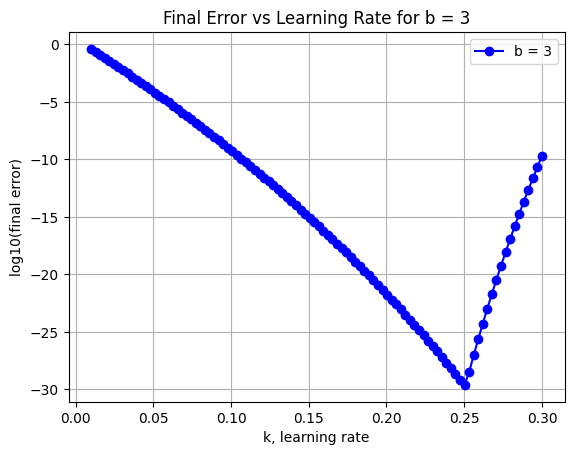

For b=3, best convergence k=0.250, error=2.403e-30


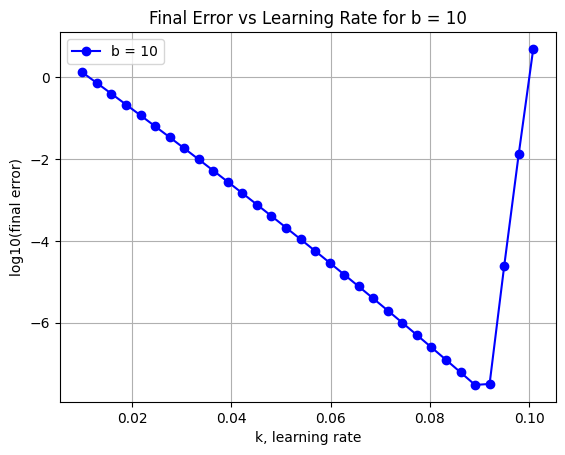

For b=10, best convergence k=0.089, error=3.003e-08


In [4]:
#Test settings
#Set seed
np.random.seed(42)
lr_test = np.linspace(0.01, 0.3, 100) #Learning rate between 0.001 and 0.3, 100 values
num_iter = 100  #Number of iterations for gradient descent function
b_val = [3, 10]  #b values per problem statement

for i in b_val:
  start_x, start_y = i, 1 #Initial values per problem statement
  error_0 = np.sqrt(start_x**2 + start_y**2) #Error from initial values

  lr_converge = [] #Keep valid learning rates when algorith converged
  error_converge = [] #Keep valid errors when algorith converged

  for j in lr_test:
    keep_results = gradient_descent(start_x, start_y, j, i, num_iter)
    err = final_error(keep_results)
    #Record when error decreased from the initial point
    if err < error_0:
      lr_converge.append(j)
      error_converge.append(err)

  #Plot log10(final error) vs lr for current b
  plt.figure()
  plt.plot(lr_converge, np.log10(error_converge), 'bo-', label=f"b = {i}")
  plt.xlabel("k, learning rate")
  plt.ylabel("log10(final error)")
  plt.title(f"Final Error vs Learning Rate for b = {i}")
  plt.grid(True)
  plt.legend()
  plt.show()

  #Best learning rate for this b meaning lowest error
  if error_converge:
    best_lr = lr_converge[np.argmin(error_converge)]
    print(f"For b={i}, best convergence k={best_lr:.3f}, error={min(error_converge):.3e}")
  else:
    print(f"For b={i}, no convergent lr in the given range.")

- As $k$ increases, for one or both values of $b$, you will observe a point where the trend of final error versus learning rate reverses direction. Pick a value of $k$ very close to the point where this occurs, and make a contour plot
of the function $f$ and the trajectory of the iterations for the gradient descent algorithm for that value of $k$ superimposed over the contour plot. What do you observe?

Note: The differences that you observe here are a special case of a more general phenomenon: the speed of convergence of gradient descent
depends on something called the _condition number_ of the
_Hessian_ matrix (the matrix of the 2nd order partial derivatives) of the target function. The condition number for a symmetric matrix is just the ratio of the largest to smallest eigenvalues, in this case the condition number is $b$ (or 1/$b$).
Gradient descent performs worse and worse the larger the condition number (and large condition numbers are problematic for a wide variety of other numerical methods).

**Solution:**

We built two contour plots with the gradient descent trajectory for different vales of learning rate and b.

For b=3, the point below the point where we observe reversing direction is k=0.24. The black path moves steadily to the global minimum (0,0) with some oscillation closer to (0,0), but we still obv=serve convergence. The function has elliptical shape which is not too stretched allowing for stable descent. (Boyd, 2008, p.466)

For b=10, higher condition number, learning rate was chosen equal to 0.08. The black path starts oscillating when moving to the global minimum, it fails to fully converge. b=10 is a high condition number, even though we chose learning rate below reversal point, it was still too large for this b.

As it was already discussed above, higher condition numbers require smaller learning rates for stable convergence. We may try smaller learning rates.

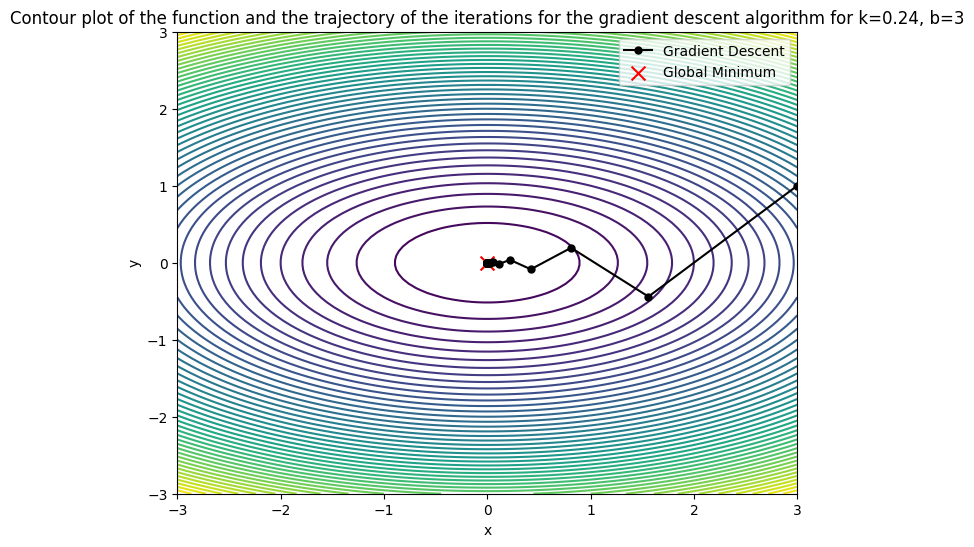

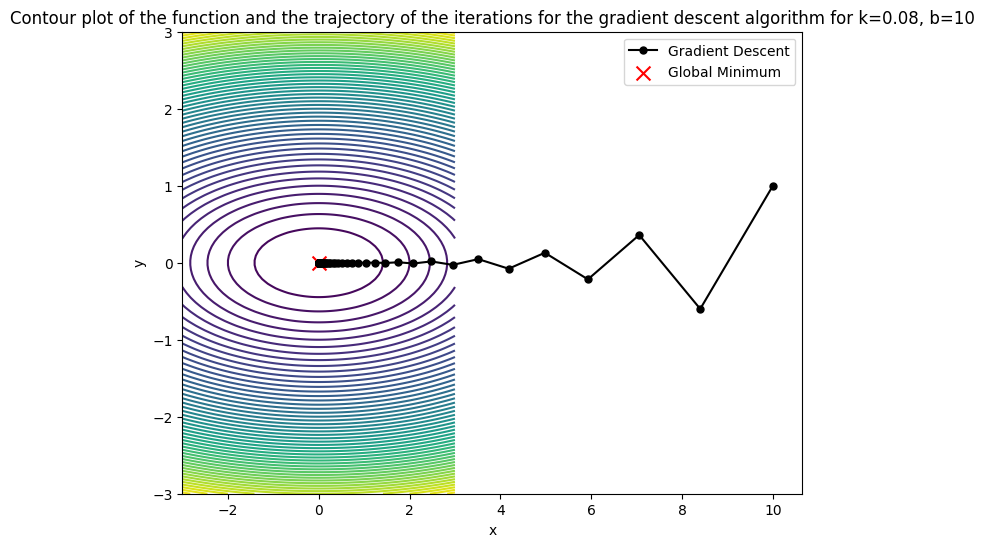

In [5]:
np.random.seed(42)
#Learning rates near the reversal points
k_b3 = 0.24
k_b10 = 0.08

#For b=3, gradient descent
b = 3
trajectory = np.array(gradient_descent(start_x=b, start_y=1, lr=k_b3, b=b, num_iteration=100))

#Grid for contour plot
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y, b)

#Plot for b=3
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ko-', markersize=5, label='Gradient Descent')
plt.scatter(0, 0, color='red', marker='x', s=100, label='Global Minimum')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Contour plot of the function and the trajectory of the iterations for the gradient descent algorithm for k={k_b3}, b={b}")
plt.legend()
plt.show()

#For b=10, gradient descent
b = 10
trajectory = np.array(gradient_descent(start_x=b, start_y=1, lr=k_b10, b=b, num_iteration=100))

#Plot for b=3
Z = f(X, Y, b)
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ko-', markersize=5, label='Gradient Descent')
plt.scatter(0, 0, color='red', marker='x', s=100, label='Global Minimum')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Contour plot of the function and the trajectory of the iterations for the gradient descent algorithm for k={k_b10}, b={b}")
plt.legend()
plt.show()

# Problem 2: Solving Least Squares Problems

Generate a random $20\times 10$ matrix $A$ and a random 20-vector $b$ (use a Gaussian distribution).
Then, solve the least squares problem:
$$
\min_{\mathbf{x}\in \mathbb{R}^{10}} \|A\mathbf{x} - \mathbf{b}\|^2
$$
in the following ways:

(a) Multiply $\mathbf{b}$ by the Morse-Penrose Pseudoinverse $A^+$.

**Solution**

The Morse-Penrose Pseudoinverse:

$$
A^† = (A^T A)^{−1}A^T,
$$
when $A^𝑇𝐴$ is invertible.

The approximate solution of the least squares problem in the simple form:
$$
\hat{x} = A^†b = (A^T A)^{−1}A^Tb.
$$

$\hat{x}$ is the unique vector that minimizes $||Ax-b||^2$ making it the optimal solution (Boyd, 2018, p. 230).

In Python, we generated a random 20x10 matrix $A$, a random 20-vector $\mathbf{b}$ (using a Gaussian distribution), and calculated solution using the above equations.

In [6]:
#Set seed
np.random.seed(42)

#Generate random matrix
A_matrix = np.random.randn(20, 10)

#Generate random vector
b_vector = np.random.randn(20)
A_matrix, b_vector

#Pseudoinvers
A_pseudoinv = np.linalg.pinv(A_matrix)
x_pseudoinv = A_pseudoinv @ b_vector

print("Solution with Moore-Penrose Pseudoinverse:", x_pseudoinv)

Solution with Moore-Penrose Pseudoinverse: [-0.07701866  0.261767   -0.15098773 -0.46088204 -0.48264709  0.01793768
  0.36960592 -0.35799919  0.1653507   0.28651436]


(b) Use built in functions to solve the least squares problem (i.e. in python numpy.lstsq, in R lm, and in Julia the backslash operator).

The solutuion using np.linalg.lstsq() is the same as using Pseudoinverse.

In [7]:
np.random.seed(42)
#Solution with built-in function
x_lstsq, _, _, _ = np.linalg.lstsq(A_matrix, b_vector, rcond=None)
print("Solution with numpy.linalg.lstsq:", x_lstsq)

Solution with numpy.linalg.lstsq: [-0.07701866  0.261767   -0.15098773 -0.46088204 -0.48264709  0.01793768
  0.36960592 -0.35799919  0.1653507   0.28651436]


(c) Using the $QR$ factorization of $A$. This factorization
rewrites $A$ as:
$$
A = \begin{bmatrix} Q & 0\end{bmatrix} \begin{bmatrix} R & 0 \end{bmatrix}^T,
$$
where $Q$ is an orthonormal matrix and $R$ is upper triangular. The
least squares solution equals:
$$
\mathbf{x} = R^{-1}Q^T\mathbf{b}
$$

The QR factorization can be used to compute the least squares approximate solution. To compute $\hat{x}$ we first multiply $b$ by $Q^T$; then we compute $R^{−1}(Q^Tb)$ using back substitution (Boyd, 2018, p. 231). TThe solution using QR factorization is the same as using Pseudoinverse and built-in function.

In [8]:
#QR factorization
Q, R = np.linalg.qr(A_matrix)

#Solve for x
x_qr = np.linalg.inv(R) @ Q.T @ b_vector

print("Solution with QR factorization:", x_qr)

Solution with QR factorization: [-0.07701866  0.261767   -0.15098773 -0.46088204 -0.48264709  0.01793768
  0.36960592 -0.35799919  0.1653507   0.28651436]


(d) Verify that each of these solutions are nearly equal and that
the residuals $A\mathbf{x}-\mathbf{b}$ are orthogonal to the vector
$A\mathbf{x}$

**Solution:**

Thus, all three methods solve the same equation and should yield the same solution.

First, we computed the difference between the solutions:
$max∣\hat{x}_{pseudo}−\hat{x}_{lstsq}|≈0, max∣\hat{x}_{pseudo}−\hat{x}_{qr}|≈0$. Python calculations confirmed that all solutions were nearly identical, up to numerical precision.

The normal equation is (Boyd, 2018, p. 229) $$A^TA\hat{x} = A^Tb.$$

The residual vector (Boyd, 2018, p. 225) $$r=A\hat{x}−b$$ is orthogonal to the column space of A, it means that $A^Tr=0.$

The maximum absolute difference between the solutions is at most $10^{−16}$ , which is practically zero due to floating-point precision limits.
The value of residuals is close to zero confirming that the residuals are orthogonal to the vector $A\mathbf{x}$.

In [9]:
#All solutions
solutions = np.vstack([x_pseudoinv, x_lstsq, x_qr])

#The maximum absolute difference among solutions
differences = np.max(np.abs(solutions - solutions[0]), axis=0)

#Residuals A*x - b
residuals_pseudo = A_matrix @ x_pseudoinv - b_vector
residuals_lstsq = A_matrix @ x_lstsq - b_vector
residuals_qr = A_matrix @ x_qr - b_vector

#Orthogonality: dot product should be close to zero
orthogonality_pseudo = np.dot(A_matrix.T, residuals_pseudo)
orthogonality_lstsq = np.dot(A_matrix.T, residuals_lstsq)
orthogonality_qr = np.dot(A_matrix.T, residuals_qr)

#Results
np.max(differences), orthogonality_pseudo, orthogonality_lstsq, orthogonality_qr

(3.3306690738754696e-16,
 array([ 2.44249065e-15, -1.60982339e-15,  4.44089210e-16, -3.33066907e-16,
         4.82947016e-15,  8.69096461e-16, -4.52415883e-15, -1.33226763e-15,
        -5.16080234e-17,  6.45317133e-15]),
 array([ 0.00000000e+00, -4.05231404e-15, -1.49880108e-15, -1.06858966e-15,
         8.77076189e-15,  1.56125113e-16, -5.55111512e-16,  9.99200722e-16,
        -1.29930788e-15,  9.97812943e-15]),
 array([-3.60822483e-16,  8.88178420e-16,  5.55111512e-16, -8.74300632e-16,
        -1.69309011e-15, -3.98639455e-15,  1.02695630e-15,  2.77555756e-16,
        -1.88651178e-15,  2.10942375e-15]))

# Problem 3: Iterative Solutions to Least Squares

Although the pseudoinverse provides an exact formula for the least
squares solutions, there are some situations in which using the exact
solution is computationally difficult, particularly when the matrix $A$
and vector $\mathbf{b}$ have a large number of entries. In this case,
$AA^T$, which is an $m\times m$ matrix if $A$ is $m\times n$, may require an enormous amount of memory. In these cases it may be better to use an
approximate solution instead of the exact formula. There are many
different approximate methods for solving least squares problems,
here we will use an iterative method developed by Richardson.

This method begins with an initial guess $\mathbf{x}^{(0)} = 0$
and calculates successive approximations as follows:

$$
    \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \mu A^T\left(A\mathbf{x}^{(k)}-\mathbf{b}\right)
$$

Here $\mu$ is a positive paramter that has a similar interpretation to the learning rate for
gradient descent. A choice that guarantees convergence is $\mu \leq \frac{1}{\|A\|}$. The iteration is terminated when the change in the residual
$\|A^T(Ax^{(k)} − b)\|$ after successive steps is below a user determined threshold, which indicates that the least squares optimal conditions are nearly satisfied.

(a) Suppose that $\mathbf{x}$ is a solution to the least squares problem:
$$
\mathbf{x} = A^+\mathbf{b}
$$

Show by substitution of the formula for the pseudoinverse that $\mathbf{x}$ is a fixed point of the iteration scheme, i.e. that:
$$
\mathbf{x} = \mathbf{x} - \mu A^T\left(A\mathbf{x}-\mathbf{b}\right)
$$

**Solution:**

From the problem, it is given that Richardson's iterative method is
$$
    \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \mu A^T\left(A\mathbf{x}^{(k)}-\mathbf{b}\right).
$$

We substituted $\mathbf{x}$ with a solution to the least squares problem $\mathbf{x} = A^†\mathbf{b}$:
$$
\mathbf{x}^{(k+1)} = A^†\mathbf{b} - \mu A^T\left(AA^†\mathbf{b}-\mathbf{b}\right).
$$

The solution to the least squares problem $\mathbf{x} = A^†\mathbf{b}$ means that we solve the problem by applying pseudoinverse to $\mathbf{b}$. Since $\mathbf{b}$ is a linear combination of the columns of $A$ (Boyd, 2018, p. 225), and $AA^†$ orthogonal projection matrix onto the column space of $A$, applying $AA^†$ doesn't change $\mathbf{b}$:

$$AA^†\mathbf{b}=\mathbf{b},$$

We can conclude:
$$AA^†\mathbf{b}-\mathbf{b}=0,$$

The original formula becomes:
$$
\mathbf{x}^{(k+1)} = A^+\mathbf{b} - \mu A^T·0,
$$
Thus
$$
\mathbf{x}^{(k+1)} = A^+\mathbf{b}.
$$

As a result, $\mathbf{x}^{(k+1)} = \mathbf{x}$ the iteration above didn't change x, meaning that $\mathbf{x} = A^+\mathbf{b}$ is a fixed point of the iteration.

(b) Generate a random 20 × 10 matrix $A$ and 20-vector $\mathbf{b}$, and compute the least squares solution $\mathbf{x} = A^+\mathbf{b}$.
Then run the Richardson algorithm with $\mu = \frac{1}{\|A\|^2}$ for
500 iterations, and plot $\|\mathbf{x}^{(k)}-\mathbf{x}\|$ to verify
that $\mathbf{x}^{(k)}$ is converging to $\mathbf{x}$

**Solution:**

We used numerical experiment to confirm the above conclusions.

First, we generated a random 20 × 10 matrix $A$ and 20-vector $\mathbf{b}$, calculated the pseudoinverse $A^+$ using np.linalg.pinv() and found the least squares solution $\mathbf{x}$ by applying the pseudoinverse to b.

Next, we used Richardson Iteration for 500 iterations with an initial guess $\mathbf{x}^{(0)} = 0$, choosing $\mu \leq \frac{1}{\|A\|^2}$, always works (Boyd, 2018, p. 241) to ensure convergence. Also, the list to store errors norm $\mathbf{x}^{(k)}$ was created before running for loop for Richardson Iteration.

Once Richardson Iteration was done, we plotted error $\|\mathbf{x}^{(k)}-\mathbf{x}\|$ over the number of iteration steps. The plot confirmed that the error norm decreases with the increasing number of iterations, the Richardson Iteration's solution approaches the mathematical solution of the least squares ($\mathbf{x}^{(k)}$ is converging to $\mathbf{x}$).

<ipython-input-10-1d11b33d53f8>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


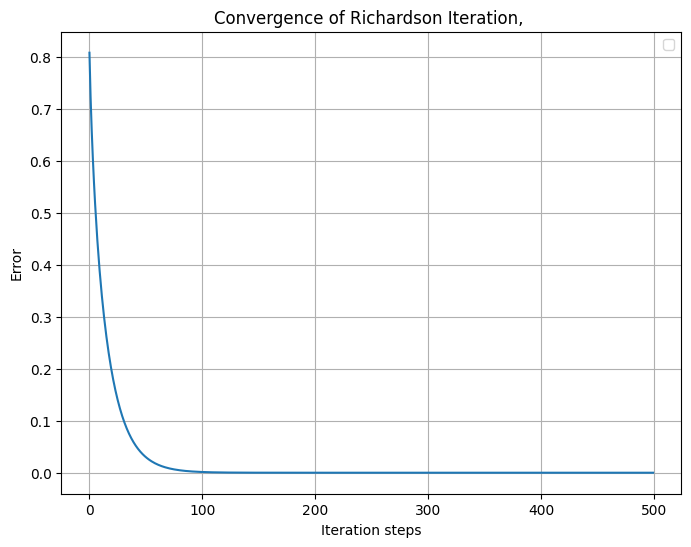

In [10]:
#Set seed
np.random.seed(42)
#Generate random matrix
A_matrix = np.random.randn(20, 10)

#Generate random vector
b_vector = np.random.randn(20)
A_matrix, b_vector

#Pseudoinvers for solution
A_pseudoinv = np.linalg.pinv(A_matrix)
x_pseudoinv = A_pseudoinv @ b_vector

#Initial guess x0=0
#For mu step size 1 / ||A||^2
x_k = np.zeros(10)
mu = 1 / np.linalg.norm(A_matrix, ord=2)**2

#Number of iterations
iterations = 500
errors = []

#Richardson Iteration
for k in range(iterations):
    x_k_1 = x_k - mu * A_matrix.T @ (A_matrix @ x_k - b_vector)
    errors.append(np.linalg.norm(x_k_1 - x_pseudoinv))
    x_k = x_k_1

#Plot convergence
plt.figure(figsize=(8, 6))
plt.plot(errors)
plt.xlabel('Iteration steps')
plt.ylabel('Error')
plt.title('Convergence of Richardson Iteration, ')
plt.legend()
plt.grid(True)
plt.show()


# Reference

1. Kolter, Z. (2008). *Linear algebra review and reference*. Updated by Chuong Do. Retrieved from https://www.cs.cmu.edu/~zkolter/course/linalg/linalg_notes.pdf

2. Boyd, S. (2018). *Introduction to applied linear algebra: Vectors, matrices, and least squares*. Cambridge University Press. https://web.stanford.edu/~boyd/vmls/vmls.pdf

3. Boyd, S., & Vandenberghe, L. (2004). *Convex optimization*. Cambridge University Press. https://doi.org/10.1017/CBO9780511804441

4. Induraj, A. (2020). Implementing gradient descent in Python . Medium. Retrieved from https://induraj2020.medium.com/implementing-gradient-descent-in-python-d1c6aeb9a448